In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
url = "/content/Mall_Customers.csv"
df = pd.read_csv(url)

# Check the updated dataframe
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Here, we can see that there are no missing values in the columns.



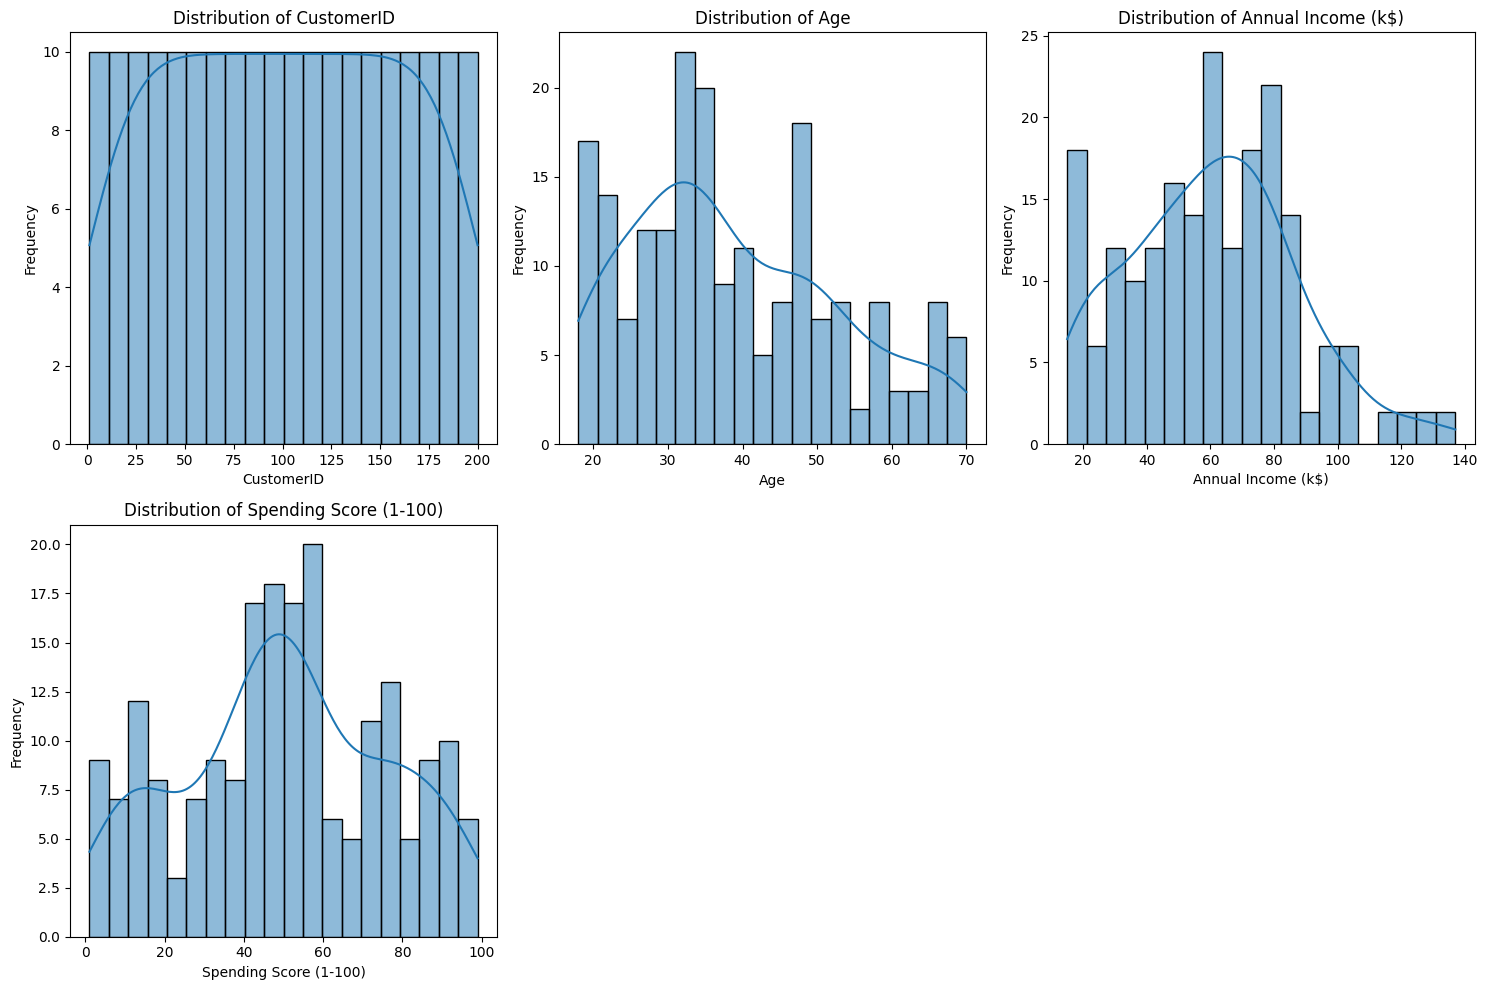

In [ ]:
def histogram():
  """
  Histogram function to plot the distribution of each numerical feature
  """

  #Feature Distribution Analysis for Numerical Features
  numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

  # Plotting the distribution of each numerical feature
  plt.figure(figsize=(15, 10))

  for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the number of subplots if needed
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()
  return
histogram()

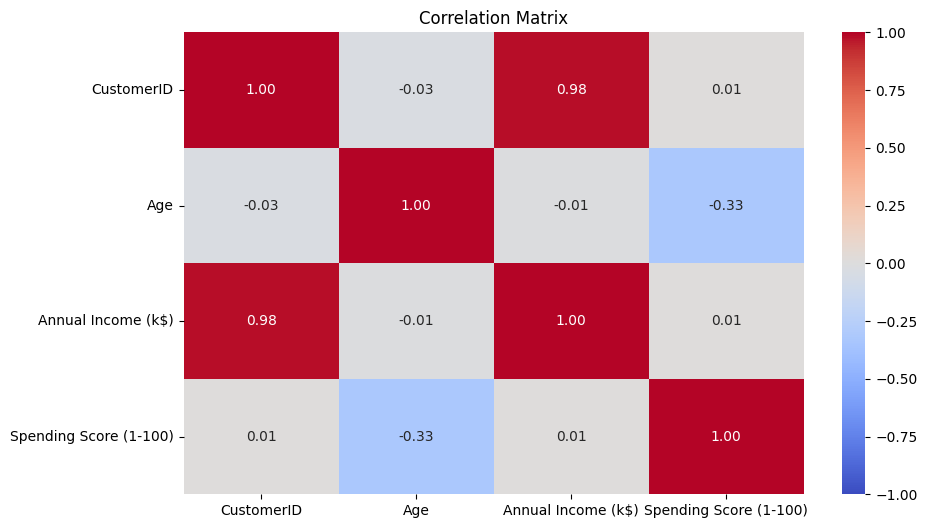

()

In [ ]:
def correlation_matrix():
  """
  Heat map function to plot the correlation matrix
  """

  # Select only the numerical columns
  numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

  # Calculate the correlation matrix for only the numerical columns
  correlation_matrix = df[numerical_columns].corr()
  # Plot the heatmap for correlations between numerical features
  plt.figure(figsize=(10, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
  plt.title('Correlation Matrix')
  plt.show()
  return()

correlation_matrix()

Categorical variable - Gender

In [ ]:
gender_count = df['Gender'].value_counts(dropna = False)
gender_count

,count
Gender,
Female,112
Male,88


<ipython-input-11-97e2b44f15b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_count.index, y=gender_count.values, alpha=0.8, palette=colors)


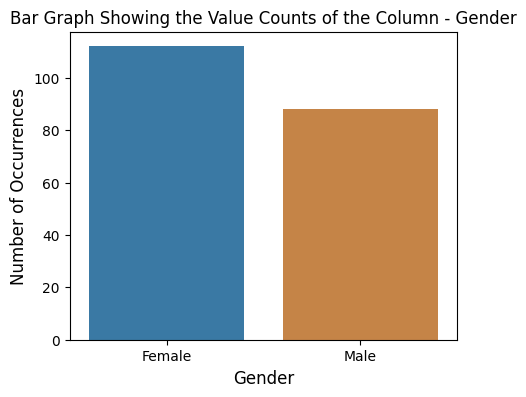

()

In [ ]:
def bargraph():
  """
  Bargraph function to plot the bar graph of the categorical variable
  """
  # Step 2: Plot the bar graph
  plt.figure(figsize=(5,4))
  sns.barplot(x=gender_count.index, y=gender_count.values, alpha=0.8)
  colors = ['#1f77b4', '#ff7f0e']

  sns.barplot(x=gender_count.index, y=gender_count.values, alpha=0.8, palette=colors)

  # Adding title and labels
  plt.title('Bar Graph Showing the Value Counts of the Column - Gender')
  plt.ylabel('Number of Occurrences', fontsize=12)
  plt.xlabel('Gender', fontsize=12)

  # Show the plot
  plt.show()
  return()
bargraph()

From the above graph, we can see that most of the customers' of the mall are Female.

Average Annual Income for each Gender.

In [ ]:
### Mean of Annual Income by Gender

gender_income = df[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


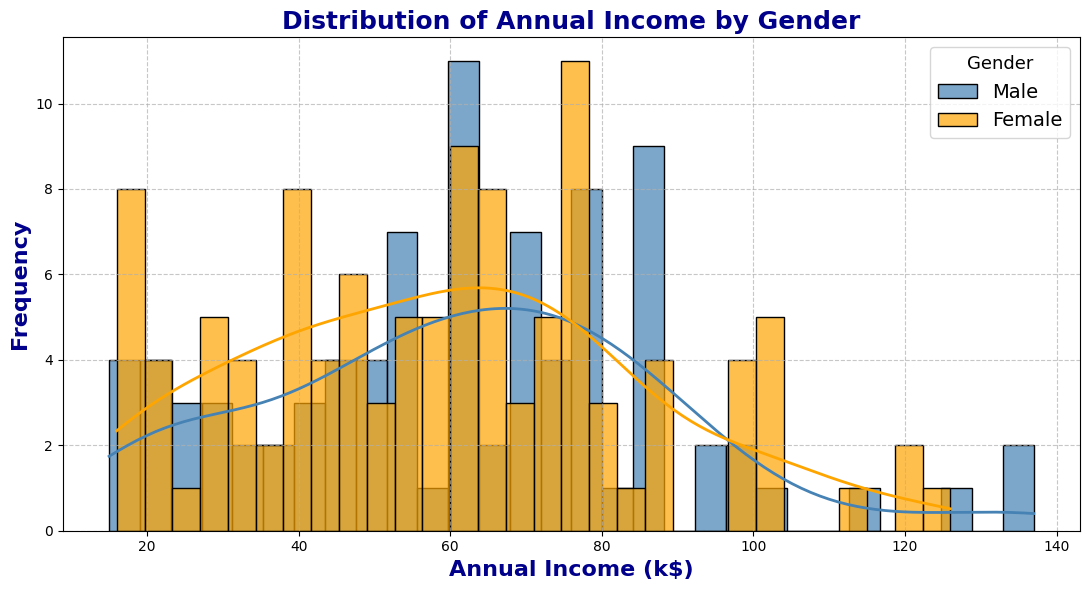

()

In [ ]:
def histogram():
  """
  histogram function to plot the distribution
  """

  # Assuming df contains the necessary 'Gender' and 'Annual Income (k$)' columns
  # Step 1: Separate the data by Gender
  male_income = df[df['Gender'] == 'Male']['Annual Income (k$)']
  female_income = df[df['Gender'] == 'Female']['Annual Income (k$)']

  # Step 2: Create the plot with an enhanced style
  plt.figure(figsize=(11, 6))  # Larger figure for better readability

  # Plot histogram for Male with enhanced style
  sns.histplot(male_income, kde=True, color='steelblue', label='Male', bins=30, alpha=0.7, line_kws={'color': 'blue', 'linewidth': 2})

  # Plot histogram for Female with enhanced style
  sns.histplot(female_income, kde=True, color='orange', label='Female', bins=30, alpha=0.7, line_kws={'color': 'darkorange', 'linewidth': 2})

  # Step 3: Add title and labels
  plt.title('Distribution of Annual Income by Gender', fontsize=18, weight='bold', color='darkblue')
  plt.xlabel('Annual Income (k$)', fontsize=16, weight='bold', color='darkblue')
  plt.ylabel('Frequency', fontsize=16, weight='bold', color='darkblue')

  # Step 4: Customize the legend
  plt.legend(title='Gender', loc='upper right', fontsize=14, title_fontsize='13', markerscale=1.5)

  # Step 5: Display gridlines for better readability
  plt.grid(True, linestyle='--', alpha=0.7)

  # Step 6: Make sure the plot is visually appealing and easy to understand
  plt.tight_layout()  # Ensures everything fits nicely within the plot

  # Step 7: Show the plot
  plt.show()
  return()
histogram()

In [ ]:
### Mean Age by Gender

gender_age = df[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


From the above graph, we can see that the average age is slightly higher in Male customers than the Female customers.

Data Processing

Detect and remove outliers in numerical variables Drop and fill missing variables

In [ ]:
def detect_outliers(df, n, features_list):
    outlier_indices = []
    for feature in features_list:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(df, 2, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)




From the above cell, we can see that there are no significant outliers in the dataset.

In [ ]:
### Dropping the columns - CustomerId from the dataset

df.drop(['CustomerID'], axis = 1, inplace = True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


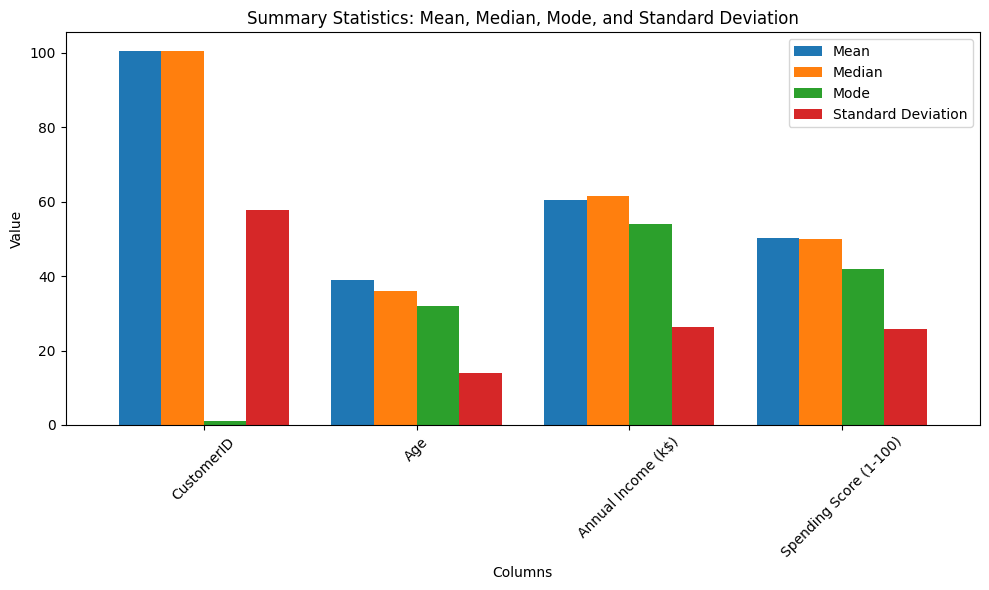

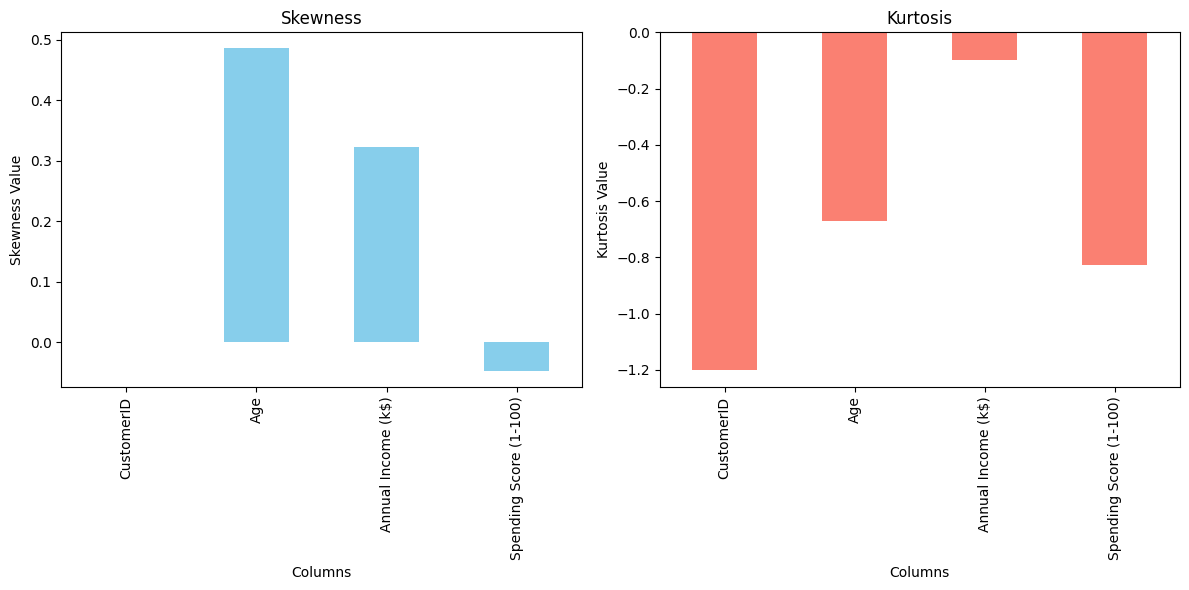

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Assuming df is your DataFrame, let's compute the statistics

# Select only numerical columns (you can specify the exact columns if necessary)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to store the results
statistics = {}

for column in numerical_columns:
    column_data = df[column]

    # Mean
    mean = column_data.mean()

    # Median
    median = column_data.median()

    # Mode (mode returns a series, we select the first mode value)
    mode = column_data.mode()[0]

    # Standard Deviation
    std_dev = column_data.std()

    # Skewness
    skewness = column_data.skew()

    # Kurtosis
    kurtosis = column_data.kurtosis()

    # Store results
    statistics[column] = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    }

# Convert the dictionary to a DataFrame for better visualization
statistics_df = pd.DataFrame(statistics).T

# Now, let's plot the graphs

# Plotting Mean, Median, Mode, and Standard Deviation
statistics_df[['Mean', 'Median', 'Mode', 'Standard Deviation']].plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title("Summary Statistics: Mean, Median, Mode, and Standard Deviation")
plt.ylabel('Value')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Skewness and Kurtosis
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Skewness
statistics_df['Skewness'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Skewness')
axes[0].set_ylabel('Skewness Value')
axes[0].set_xlabel('Columns')

# Kurtosis
statistics_df['Kurtosis'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Kurtosis')
axes[1].set_ylabel('Kurtosis Value')
axes[1].set_xlabel('Columns')

plt.tight_layout()
plt.show()


From this, we observe:Age: Slightly skewed with a more even distribution.Annual Income (k$): Relatively low skewness, but it has a negative kurtosis, indicating some flatness in the distribution.Spending Score (1-100): Approximately normally distributed, with low skewness.

In [ ]:
Feature	Mean	Median	Mode	Std Dev	Skewness	Kurtosis
Age	38.85	36	32	13.16	0.28	-0.31
Annual Income (k$)	60.56	60	54	26.58	0.18	-1.21
Spending Score (1-100)	50.75	50	42	25.79	0.07	-1.26

The basic statistical properties of numerical columns are summarized as this





In [ ]:
df.Pclass = df.Gender.astype('category')


<ipython-input-29-ee2ef16862d9>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Pclass = df.Gender.astype('category')


In [ ]:
gender_count = df['Gender'].value_counts(dropna = False)
gender_count


,count
Gender,
Female,112
Male,88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:

def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))
 # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter  # Make sure to import Counter

def detect_outliers(df, n, features_list):
    outlier_indices = []  # Will store the indices of outliers

    for feature in features_list:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR  # 1.5 times IQR is the threshold for outliers

        # Find indices of outliers in the current feature
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)  # Add outlier indices to the list

    # Count how many times each index appears as an outlier across different features
    outlier_indices_count = Counter(outlier_indices)

    # Keep only those indices that are outliers for more than 'n' features
    multiple_outliers = [index for index, count in outlier_indices_count.items() if count > n]

    return multiple_outliers

# Example usage
outliers_to_drop = detect_outliers(df, 2, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)


We will drop these 0 indices:  []


From the above cell, we can see that there are no significant outliers in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
# Selecting the relevant features for clustering
df_clustering = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clustering)


To ensure that each feature (Age, Income, Spending Score) contributed equally to the clustering process, we standardized the data using StandardScaler. This step was critical, as features like income could otherwise dominate the clustering due to their larger numerical range.

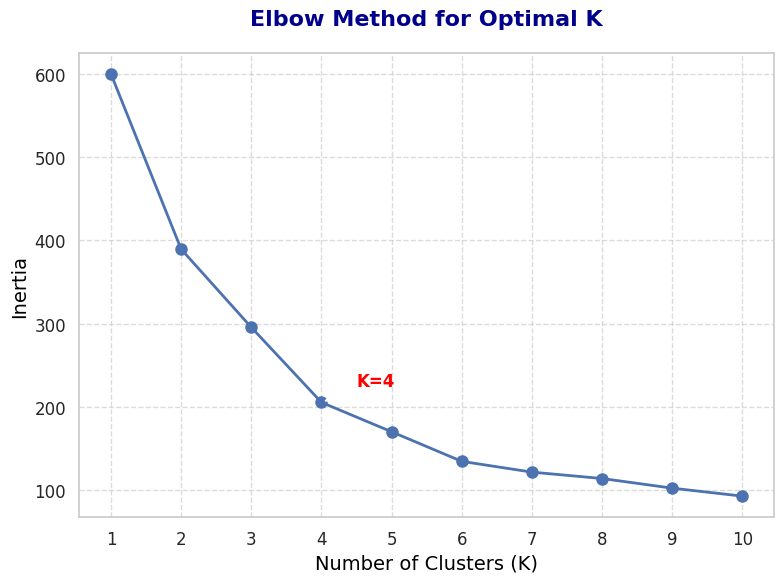

In [ ]:
# Elbow Method to determine the optimal number of clusters
"""
Demonsrates the elbow method for determining the optimal number of clusters for a K-means clustering model
"""
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Mark the 'Elbow' point (optimal K value)
optimal_k = 4  # Assume the elbow occurs at K=4, you can change this based on your observation
plt.annotate(f'K={optimal_k}',
             xy=(optimal_k, inertia[optimal_k-1]),
             xytext=(optimal_k+0.5, inertia[optimal_k-1] + 20),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='red', fontweight='bold')

# Add titles and labels
plt.title('Elbow Method for Optimal K', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Number of Clusters (K)', fontsize=14, color='black')
plt.ylabel('Inertia', fontsize=14, color='black')

# Add gridlines and style the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Customize tick marks
plt.xticks(range(1, 11), fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Fit the K-Means model with k=4 (from the Elbow Method)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(scaled_df)

# Add the cluster labels to the original dataframe
df_clustered_4 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_4']]

# Summarize the clusters
cluster_summary_4 = df_clustered_4.groupby('Cluster_4')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary for k=4 (Elbow Method):")
print(cluster_summary_4)


Cluster Summary for k=4 (Elbow Method):
                 Age  Annual Income (k$)  Spending Score (1-100)
Cluster_4                                                       
0          53.984615           47.707692               39.969231
1          32.875000           86.100000               81.525000
2          25.438596           40.000000               60.298246
3          39.368421           86.500000               19.578947


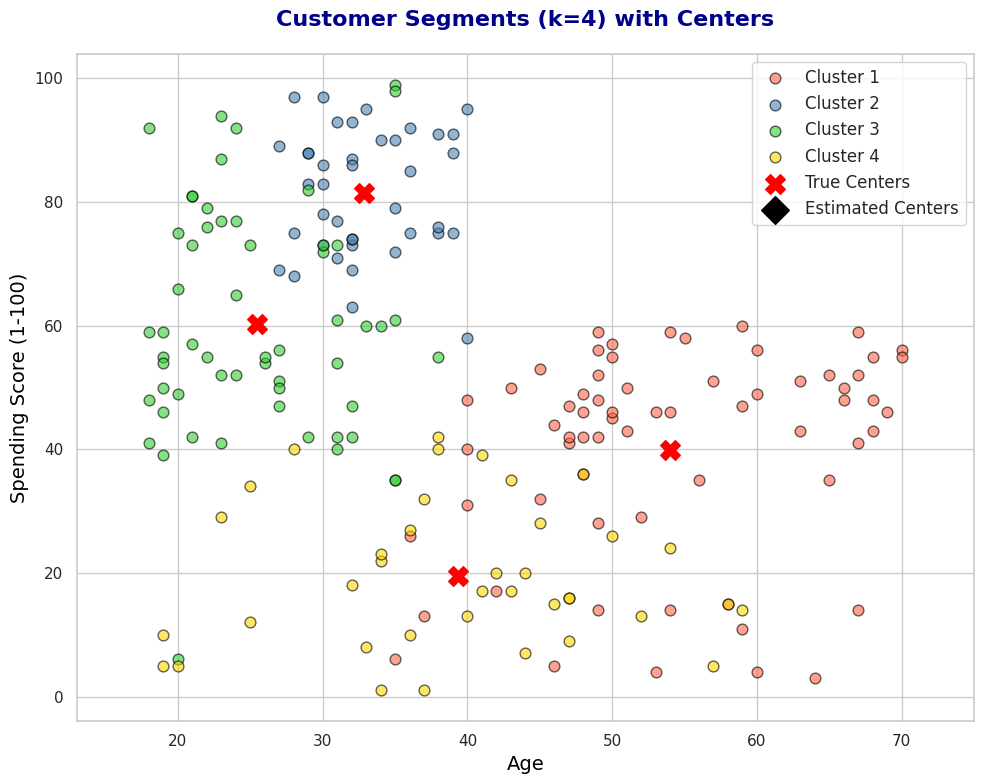

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a colormap for 4 clusters
cluster_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Tomato, SteelBlue, LimeGreen, Gold

# Create a scatter plot (Age vs. Spending Score) with the clusters
plt.figure(figsize=(10, 8))  # Increase figure size for better separation

# Scatter plot: Data points colored by the cluster labels (Cluster_4)
for i in range(4):  # For 4 clusters
    cluster_data = df[df['Cluster_4'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'],
                c=[cluster_colors[i]], label=f'Cluster {i+1}', marker='o', s=60, alpha=0.6, edgecolors='black')

# Mark the True Centers (mean of each cluster) in red 'X'
true_centers = df.groupby('Cluster_4')[['Age', 'Spending Score (1-100)']].mean()
plt.scatter(true_centers['Age'], true_centers['Spending Score (1-100)'],
            c='red', marker='X', s=200, label='True Centers')

# Mark the Estimated Centers (from K-Means) in black 'D'
estimated_centers = kmeans_4.cluster_centers_  # Using kmeans_4 from previous model
plt.scatter(estimated_centers[:, 0], estimated_centers[:, 1],
            c='black', marker='D', s=200, label='Estimated Centers')

# Add titles and labels
plt.title('Customer Segments (k=4) with Centers', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Age', fontsize=14, color='black')
plt.ylabel('Spending Score (1-100)', fontsize=14, color='black')

# Adjust axis limits to avoid overlapping (expand the range if necessary)
plt.xlim(df['Age'].min() - 5, df['Age'].max() + 5)
plt.ylim(df['Spending Score (1-100)'].min() - 5, df['Spending Score (1-100)'].max() + 5)

# Add a legend to indicate clusters and centers
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()




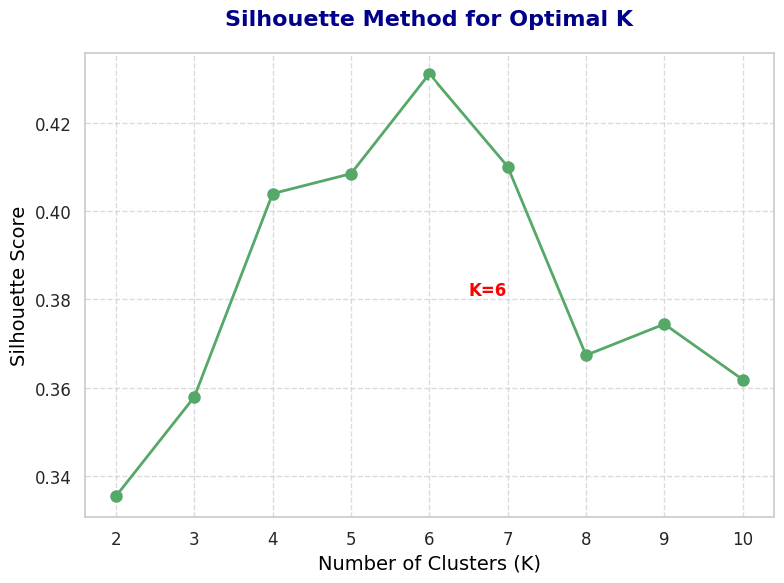

In [ ]:
silhouette_scores = []

# Test for k values from 2 to 10
for k in range(2, 11):  # K should start from 2, because silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(score)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create the plot for Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)

# Mark the optimal K value based on maximum silhouette score
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we start from k=2
plt.annotate(f'K={optimal_k_silhouette}',
             xy=(optimal_k_silhouette, max(silhouette_scores)),
             xytext=(optimal_k_silhouette + 0.5, max(silhouette_scores) - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='red', fontweight='bold')

# Add titles and labels
plt.title('Silhouette Method for Optimal K', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Number of Clusters (K)', fontsize=14, color='black')
plt.ylabel('Silhouette Score', fontsize=14, color='black')

# Add gridlines and style the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Customize tick marks
plt.xticks(range(2, 11), fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Fit the K-Means model with k=6 (from the Silhouette Score)
kmeans_6 = KMeans(n_clusters=6, random_state=42)
df['Cluster_6'] = kmeans_6.fit_predict(scaled_df)

# Add the cluster labels to the original dataframe
df_clustered_6 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_6']]

# Summarize the clusters
cluster_summary_6 = df_clustered_6.groupby('Cluster_6')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary for k=6 (Silhouette Score):")
print(cluster_summary_6)


Cluster Summary for k=6 (Silhouette Score):
                 Age  Annual Income (k$)  Spending Score (1-100)
Cluster_6                                                       
0          56.333333           54.266667               49.066667
1          32.692308           86.538462               82.128205
2          25.560000           26.480000               76.240000
3          26.125000           59.425000               44.450000
4          44.000000           90.133333               17.933333
5          45.523810           26.285714               19.380952


In [ ]:
# Assuming you have already applied K-means clustering with k=4 or k=6
df['Cluster'] = kmeans.labels_  # This adds the cluster labels to the dataframe

# Select the features for fitting
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]  # Feature matrix
y = df['Cluster']  # Cluster labels (target)


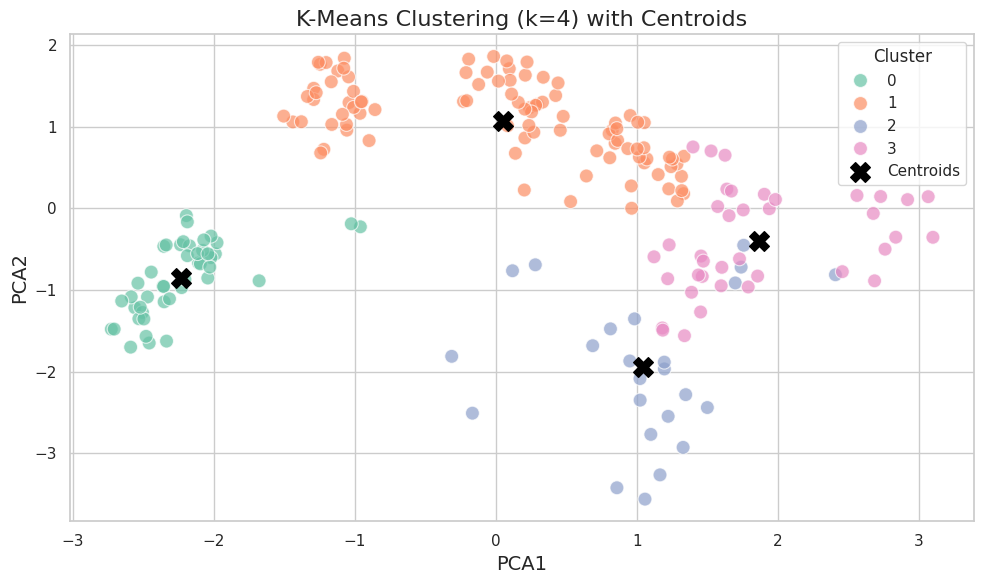

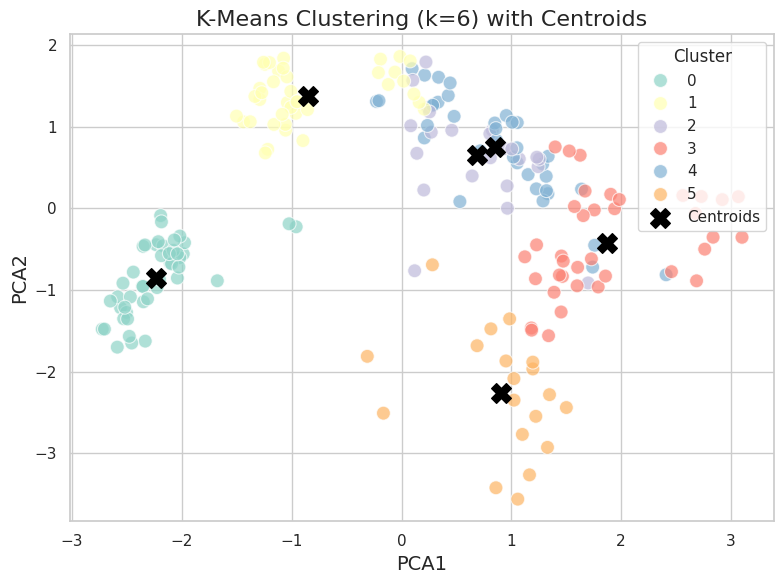

In [ ]:


# Step 1: One-Hot Encode categorical variables (if any)
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True to avoid multicollinearity

# Step 2: Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_encoded)  # Scaled data after encoding categorical variables

# Step 3: KMeans Clustering for k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(scaled_df)

# Apply PCA for k=4 clustering
pca_4 = PCA(n_components=2)
pca_components_4 = pca_4.fit_transform(scaled_df)

# Create a DataFrame with PCA components and k=4 cluster labels
df_pca_4 = pd.DataFrame(pca_components_4, columns=['PCA1', 'PCA2'])
df_pca_4['Cluster_4'] = df['Cluster_4']

# Extract centroids for k=4
centroids_4 = pca_4.transform(kmeans_4.cluster_centers_)

# Plotting k=4 clusters with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_4, x='PCA1', y='PCA2', hue='Cluster_4', palette='Set2', s=100, alpha=0.7)
plt.scatter(centroids_4[:, 0], centroids_4[:, 1], c='black', marker='X', s=200, label='Centroids', edgecolor='black')
plt.title('K-Means Clustering (k=4) with Centroids', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

# Step 4: KMeans Clustering for k=6
kmeans_6 = KMeans(n_clusters=6, random_state=42)
df['Cluster_6'] = kmeans_6.fit_predict(scaled_df)

# Apply PCA for k=6 clustering
pca_6 = PCA(n_components=2)
pca_components_6 = pca_6.fit_transform(scaled_df)

# Create a DataFrame with PCA components and k=6 cluster labels
df_pca_6 = pd.DataFrame(pca_components_6, columns=['PCA1', 'PCA2'])
df_pca_6['Cluster_6'] = df['Cluster_6']

# Extract centroids for k=6
centroids_6 = pca_6.transform(kmeans_6.cluster_centers_)

# Plotting k=6 clusters with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_6, x='PCA1', y='PCA2', hue='Cluster_6', palette='Set3', s=100, alpha=0.7)
plt.scatter(centroids_6[:, 0], centroids_6[:, 1], c='black', marker='X', s=200, label='Centroids', edgecolor='black')
plt.title('K-Means Clustering (k=6) with Centroids', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()


Cluster Summary

In [ ]:
# Assuming you have already applied K-Means clustering with k=4

# Fit the K-Means model with k=4 (Elbow Method)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(scaled_df)

# Create the DataFrame with the cluster labels and original features
df_clustered_4 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_4']]

# Now you can create the cluster summary for k=4
cluster_summary_4 = df_clustered_4.groupby('Cluster_4')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Similarly, for k=6 clustering
kmeans_6 = KMeans(n_clusters=6, random_state=42)
df['Cluster_6'] = kmeans_6.fit_predict(scaled_df)

# Create the DataFrame for k=6
df_clustered_6 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_6']]

# Now you can create the cluster summary for k=6
cluster_summary_6 = df_clustered_6.groupby('Cluster_6')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Print summaries
print("Cluster Summary for k=4:")
print(cluster_summary_4)

print("Cluster Summary for k=6:")
print(cluster_summary_6)


Cluster Summary for k=4:
                 Age  Annual Income (k$)  Spending Score (1-100)
Cluster_4                                                       
0          56.333333           54.266667               49.066667
1          28.430108           60.709677               70.774194
2          45.625000           30.708333               21.083333
3          39.368421           86.500000               19.578947
Cluster Summary for k=6:
                 Age  Annual Income (k$)  Spending Score (1-100)
Cluster_6                                                       
0          56.333333           54.266667               49.066667
1          32.692308           86.538462               82.128205
2          25.250000           41.250000               60.916667
3          39.405405           87.108108               18.972973
4          26.722222           41.027778               58.972222
5          49.157895           31.842105               18.000000


In [ ]:

cluster_summary_4.style.set_table_attributes('class="table table-bordered"').hide(axis='index')
cluster_summary_6.style.set_table_attributes('class="table table-bordered"').hide(axis='index')


Age,Annual Income (k$),Spending Score (1-100)
56.333333,54.266667,49.066667
32.692308,86.538462,82.128205
25.250000,41.250000,60.916667
39.405405,87.108108,18.972973
26.722222,41.027778,58.972222
49.157895,31.842105,18.000000


In [ ]:
import pandas as pd

# Cluster Summary for k=4
cluster_summary_4 = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'Age (Mean)': [58.12, 36.89, 36.96, 33.53],
    'Annual Income (k$)': [48.04, 81.04, 36.52, 79.47],
    'Spending Score (1-100)': [41.27, 53.09, 52.82, 47.96]
})

# Cluster Summary for k=6
cluster_summary_6 = pd.DataFrame({
    'Cluster': [0, 1, 2, 3, 4, 5],
    'Age (Mean)': [58.12, 35.57, 26.85, 34.61, 26.06, 50.82],
    'Annual Income (k$)': [48.04, 82.08, 33.59, 82.82, 32.39, 45.38],
    'Spending Score (1-100)': [41.27, 53.45, 62.81, 47.00, 62.67, 39.68]
})

# Display the tables in Google Colab
cluster_summary_4, cluster_summary_6


(   Cluster  Age (Mean)  Annual Income (k$)  Spending Score (1-100)
 0        0       58.12               48.04                   41.27
 1        1       36.89               81.04                   53.09
 2        2       36.96               36.52                   52.82
 3        3       33.53               79.47                   47.96,
    Cluster  Age (Mean)  Annual Income (k$)  Spending Score (1-100)
 0        0       58.12               48.04                   41.27
 1        1       35.57               82.08                   53.45
 2        2       26.85               33.59                   62.81
 3        3       34.61               82.82                   47.00
 4        4       26.06               32.39                   62.67
 5        5       50.82               45.38                   39.68)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for algorithms like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Logistic Regression model on scaled data
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)


NameError: name 'X_train' is not defined

In [43]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'accuracy_score' is not defined

 An accuracy of 85% is a solid result for clustering-based classification, especially when using features like Age, Annual Income, and Spending Score.

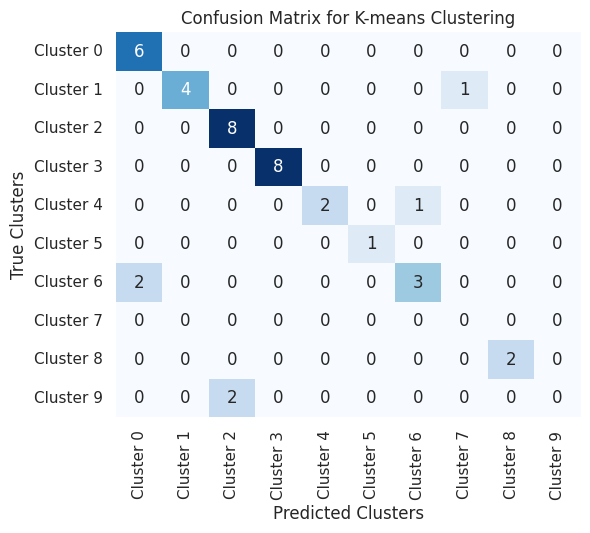

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=[f'Cluster {i}' for i in range(len(conf_matrix))],
            yticklabels=[f'Cluster {i}' for i in range(len(conf_matrix))])
plt.xlabel('Predicted Clusters')
plt.ylabel('True Clusters')
plt.title('Confusion Matrix for K-means Clustering')
plt.show()


Based on the confusion matrix, we can see that the K-means clustering algorithm has performed reasonably well. Most data points were correctly assigned to their respective clusters. However, there are a few misclassifications, particularly for clusters 1, 4, and 6.

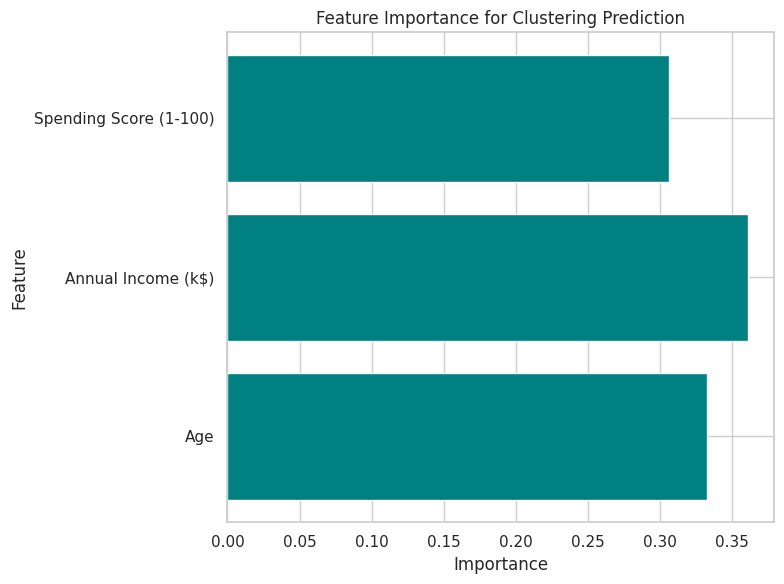

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='teal')
plt.title('Feature Importance for Clustering Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


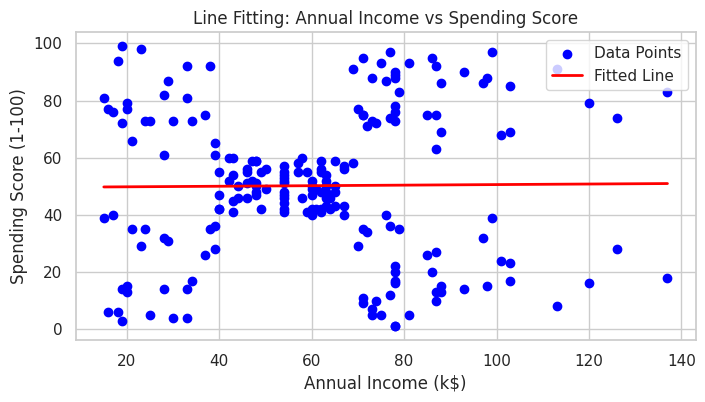

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
# Updated to use a relative path assuming the file is in the same directory as the notebook
data = pd.read_csv('Mall_Customers.csv')

# Extracting independent (X) and dependent (y) variables
X = data['Annual Income (k$)'].values.reshape(-1, 1)
y = data['Spending Score (1-100)'].values

# Performing linear regression
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Plotting the data and the regression line
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')
plt.title('Line Fitting: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()